In [162]:
import yfinance as yf 
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [163]:
#define variables
FAST_MA = 50
SLOW_MA = 200
STARTING_BALANCE = 10000

In [164]:
#define time period
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2025, 1, 1)
YEARS = (END - START).days / 365.25

In [165]:
price = yf.download(
    '^GSPC',
    start=START,
    end=END,
    progress=False,
    auto_adjust=False 
)

if isinstance(price.columns, pd.MultiIndex):
    price.columns = price.columns.get_level_values(0)

styled_head = price.head().style \
    .format({
        'Open': '{:,.2f}', 'High': '{:,.2f}', 'Low': '{:,.2f}', 
        'Close': '{:,.2f}', 'Adj Close': '{:,.2f}', 'Volume': '{:,.0f}'
    }) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'right')]}
    ]) \
    .set_caption("S&P 500 Data Preview")

display(styled_head)


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03 00:00:00,"1,455.22","1,455.22","1,478.00","1,438.36","1,469.25","931,800,000"
2000-01-04 00:00:00,"1,399.42","1,399.42","1,455.22","1,397.43","1,455.22","1,009,000,000"
2000-01-05 00:00:00,"1,402.11","1,402.11","1,413.27","1,377.68","1,399.42","1,085,500,000"
2000-01-06 00:00:00,"1,403.45","1,403.45","1,411.90","1,392.10","1,402.11","1,092,300,000"
2000-01-07 00:00:00,"1,441.47","1,441.47","1,441.47","1,400.73","1,403.45","1,225,200,000"


In [166]:
price = price[['Open', 'Close']]
price.head()

Price,Open,Close
Date,,
2000-01-03,1469.250000,1455.219971
2000-01-04,1455.219971,1399.420044
2000-01-05,1399.420044,1402.109985
2000-01-06,1402.109985,1403.449951
2000-01-07,1403.449951,1441.469971


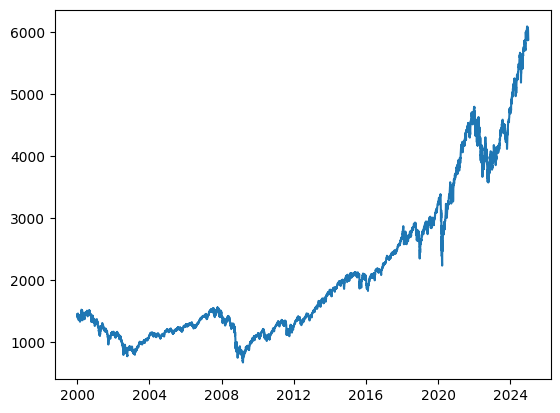

In [167]:
#plot chart
plt.plot(price.Close)
plt.show()

In [168]:
#calculate daily return
price['Return'] = price.Close / price.Open

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Open,Close,Return,Bench_Bal
Date,,,,
2024-12-24,5984.629883,6040.040039,1.009259,21198.415028
2024-12-26,6024.970215,6037.589844,1.002095,21242.816265
2024-12-27,6006.169922,5970.839844,0.994118,21117.859701
2024-12-30,5920.669922,5906.939941,0.997681,21068.887574
2024-12-31,5919.740234,5881.629883,0.993562,20933.249407


In [169]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) - 1) * 100, 2)
bench_cagr = round((((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) ** (1 / YEARS)) - 1) * 100, 2)

print(f"Benchmark Total Return: {bench_return}%")
print(f"Benchmark CAGR: {bench_cagr}%")

Benchmark Total Return: 111.35%
Benchmark CAGR: 3.04%


In [170]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

print(bench_dd)

-52.29


In [171]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Date,,,,,,,,
2024-12-24,5984.629883,6040.040039,1.009259,21198.415028,22044.192806,-845.777778,5933.808203,5535.671353
2024-12-26,6024.970215,6037.589844,1.002095,21242.816265,22044.192806,-801.376541,5938.254805,5539.982952
2024-12-27,6006.169922,5970.839844,0.994118,21117.859701,22044.192806,-926.333105,5940.822197,5544.010601
2024-12-30,5920.669922,5906.939941,0.997681,21068.887574,22044.192806,-975.305232,5942.131592,5547.792900
2024-12-31,5919.740234,5881.629883,0.993562,20933.249407,22044.192806,-1110.943399,5942.470791,5551.615601


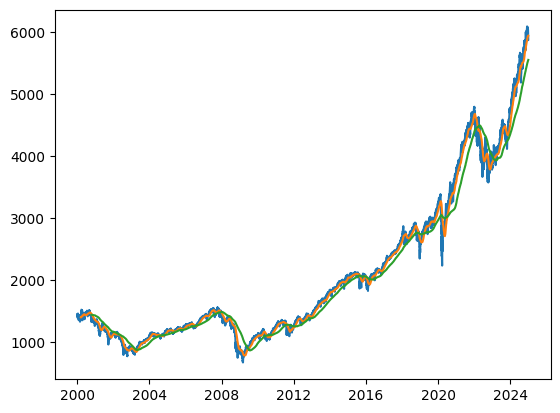

In [172]:
#draw graph
plt.plot(price.Close)
plt.plot(price.Fast_MA)
plt.plot(price.Slow_MA)

plt.show()

In [173]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

Price,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Date,,,,,,,,,
2024-12-24,5984.629883,6040.040039,1.009259,21198.415028,22044.192806,-845.777778,5933.808203,5535.671353,True
2024-12-26,6024.970215,6037.589844,1.002095,21242.816265,22044.192806,-801.376541,5938.254805,5539.982952,True
2024-12-27,6006.169922,5970.839844,0.994118,21117.859701,22044.192806,-926.333105,5940.822197,5544.010601,True
2024-12-30,5920.669922,5906.939941,0.997681,21068.887574,22044.192806,-975.305232,5942.131592,5547.792900,True
2024-12-31,5919.740234,5881.629883,0.993562,20933.249407,22044.192806,-1110.943399,5942.470791,5551.615601,True


In [174]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.tail()

Price,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Date,,,,,,,,,,
2024-12-24,5984.629883,6040.040039,1.009259,21198.415028,22044.192806,-845.777778,5933.808203,5535.671353,True,1.009259
2024-12-26,6024.970215,6037.589844,1.002095,21242.816265,22044.192806,-801.376541,5938.254805,5539.982952,True,1.002095
2024-12-27,6006.169922,5970.839844,0.994118,21117.859701,22044.192806,-926.333105,5940.822197,5544.010601,True,0.994118
2024-12-30,5920.669922,5906.939941,0.997681,21068.887574,22044.192806,-975.305232,5942.131592,5547.792900,True,0.997681
2024-12-31,5919.740234,5881.629883,0.993562,20933.249407,22044.192806,-1110.943399,5942.470791,5551.615601,True,0.993562


In [175]:
#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

Price,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,
2024-12-24,5984.629883,6040.040039,1.009259,21198.415028,22044.192806,-845.777778,5933.808203,5535.671353,True,1.009259,27858.028849
2024-12-26,6024.970215,6037.589844,1.002095,21242.816265,22044.192806,-801.376541,5938.254805,5539.982952,True,1.002095,27916.379011
2024-12-27,6006.169922,5970.839844,0.994118,21117.859701,22044.192806,-926.333105,5940.822197,5544.010601,True,0.994118,27752.166565
2024-12-30,5920.669922,5906.939941,0.997681,21068.887574,22044.192806,-975.305232,5942.131592,5547.792900,True,0.997681,27687.809540
2024-12-31,5919.740234,5881.629883,0.993562,20933.249407,22044.192806,-1110.943399,5942.470791,5551.615601,True,0.993562,27509.559800


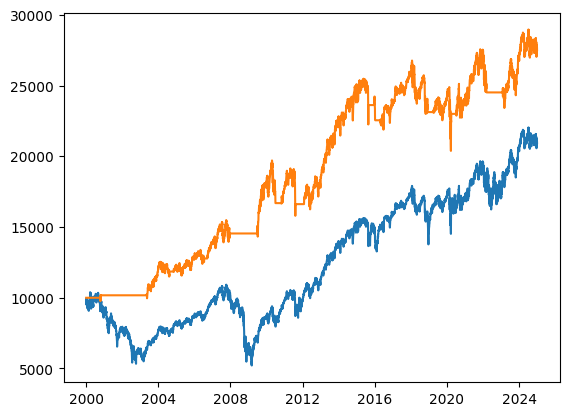

In [176]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal)

plt.show()

In [177]:
# Calculate system metrics (fixed for deprecation – uses .iloc for positions)
sys_return = round(((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round((((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) ** (1 / YEARS)) - 1) * 100, 2)

print(f"System Total Return: {sys_return}%")
print(f"System CAGR: {sys_cagr}%")

System Total Return: 175.1%
System CAGR: 4.13%


In [178]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-23.86


In [179]:
print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')

Benchmark Total return: 111.35%
Benchmark CAGR: 3.04
Benchmark DD: -52.29%

System Total return: 175.1%
System CAGR: 4.13
System DD: -23.86%
